# Générateur de mot

### Import

In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Récupération des données
fichier = open("./ProjetPython/notredame.txt", "r")

# Lecture du text
text = fichier.read()

# Suppression des caractères spéciaux et les chiffres
list_str = [",",".","*","+","-","_","?","'","[","]","(",")","{","}",'"',";",":","!","`","#","&","@","$","%","/","«","»"] + [str(i) for i in range(0,10)]
text = ''.join([c if c not in list_str else ' ' for c in text])

# On retire les lignes vides ainsi que la préface et les références
text = " ".join(list(filter((lambda x: x!=''),text.split("\n")[142:21311])))


# On enlève les espaces en trop
text = ' '+' '.join(text.split())

# Et on downcase le text restant
text = text.lower()

print(text)


 préface il y a quelques années qu en visitant ou pour mieux dire en furetant notre dame l auteur de ce livre trouva dans un recoin obscur de l une des tours ce mot gravé à la main sur le mur anankê ces majuscules grecques noires de vétusté et assez profondément entaillées dans la pierre je ne sais quels signes propres à la calligraphie gothique empreints dans leurs formes et dans leurs attitudes comme pour révéler que c était une main du moyen âge qui les avait écrites là surtout le sens lugubre et fatal qu elles renferment frappèrent vivement l auteur il se demanda il chercha à deviner quelle pouvait être l âme en peine qui n avait pas voulu quitter ce monde sans laisser ce stigmate de crime ou de malheur au front de la vieille église depuis on a badigeonné ou gratté je ne sais plus lequel le mur et l inscription a disparu car c est ainsi qu on agit depuis tantôt deux cents ans avec les merveilleuses églises du moyen âge les mutilations leur viennent de toutes parts du dedans comme d

In [2]:
nbAppear = dict()

def lireDict(dictionnaire,clef):
    if (clef in dictionnaire.keys()):
        return dictionnaire[clef]
    return None

def mange(text):
    global nbAppear
    for i in range(0,len(text)-1):
        premiereLettre = lireDict(nbAppear,text[i])
        if premiereLettre != None :
            secondeLettre = lireDict(premiereLettre,text[i+1])
            if secondeLettre != None :
                nbAppear[text[i]][text[i+1]] += 1
            else :
                nbAppear[text[i]] = {**nbAppear[text[i]], **{text[i+1]: 1}}
        else :
            nbAppear = {**nbAppear, **{text[i]:{text[i+1]: 1}}}

'''
def mangeMieux(text, nb):
    global nbAppear
    



'''
mange(text)
print(nbAppear)

{' ': {'p': 13608, 'i': 4988, 'y': 881, 'a': 11590, 'q': 7169, 'e': 13875, 'v': 5458, 'o': 3314, 'm': 8133, 'd': 22168, 'f': 5549, 'n': 4314, 'l': 19967, 'c': 13580, 't': 6872, 'u': 4896, 'r': 5375, 'g': 3043, 'à': 3557, 's': 13826, 'j': 3294, 'é': 4445, 'â': 142, 'ê': 353, 'b': 4102, 'h': 2119, 'ç': 56, 'x': 81, 'è': 10, 'k': 10, 'ô': 25, 'î': 34, 'z': 26, 'w': 2, 'æ': 2}, 'p': {'r': 2874, 'o': 3078, 'i': 1559, 'h': 600, 'p': 776, 'è': 184, 'e': 3015, 'a': 4915, 'u': 842, 'l': 2149, 't': 486, 's': 408, ' ': 361, 'é': 440, 'ê': 65, 'â': 50, 'û': 11, 'ô': 7, 'y': 18, 'v': 1, 'î': 1, 'c': 2, 'm': 1, 'ç': 2}, 'r': {'é': 1829, ' ': 9536, 'e': 13477, 'o': 3842, 's': 2340, 'a': 4930, 'r': 1443, 'm': 1002, 'i': 4847, 't': 2231, 'c': 1208, 'u': 1073, 'v': 361, 'ê': 426, 'd': 1697, 'è': 585, 'b': 248, 'q': 126, 'l': 279, 'n': 676, 'z': 13, 'g': 624, 'â': 86, 'û': 44, 'ô': 72, 'p': 239, 'f': 52, 'ç': 80, 'y': 79, 'h': 13, 'î': 4, 'æ': 9, 'j': 2}, 'é': {'f': 147, 'e': 1817, ' ': 3129, 't': 2728, 

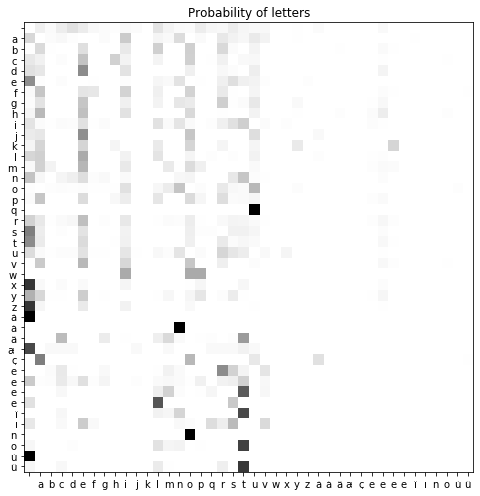

In [5]:
all_letter = sorted([key for key in nbAppear.keys()])
data = np.matrix([[0. for y in range(0,len(all_letter))] for x in range(0,len(all_letter))])
probData = data.copy()


i = 0
for letter1 in all_letter:
    y = 0
    for letter2 in all_letter:
        if letter2 in nbAppear[letter1].keys():
            data[i,y] = nbAppear[letter1][letter2]
        else :
            data[i,y] = 0
        y+=1
    i+=1


somm = [x.sum() for x in data]
for i in range(0,len(somm)) :
    for y in range(0,len(somm)) :
        probData[i,y] = (float(data[i,y])*100.0)/float(somm[i])
        

fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(probData, cmap=cm.binary)

ax.set_xticks(np.arange(len(all_letter)))
ax.set_yticks(np.arange(len(all_letter)))

ax.set_xticklabels(all_letter)
ax.set_yticklabels(all_letter)

ax.set_title("Probability of letters")
fig.tight_layout()
plt.show()

In [7]:
def findLetter(c):
    i = 0
    y = all_letter.index(c)
    r = random.randint(0,somm[y])
    while(r>data[i,y]):
        r-=data[i,y]
        i+=1
    return all_letter[i]


def generator():
    mot = ""+findLetter(' ')
    while(mot[-1]!=' '):
        mot+=findLetter(mot[-1])
    return mot


def generatorT(t):
    mot = ""+findLetter(' ')
    for i in range(1,t):
        l = findLetter(mot[-1])
        while(l==' '):
            l = findLetter(mot[-1])
        mot+=l
    return mot


#print(data)
for i in range(0,20):
    print("mot aléatoire   : "+generator())
t = 5
for i in range(0,0):
    print("mot de taille "+str(t)+": "+generatorT(t))

mot aléatoire   : sastiauvad 
mot aléatoire   : sriff 
mot aléatoire   : sneteh 
mot aléatoire   : nulihod 
mot aléatoire   : sp 
mot aléatoire   : semuqial 
mot aléatoire   : e 
mot aléatoire   : lp 
mot aléatoire   : ner 
mot aléatoire   : suohlel 
mot aléatoire   : cs 
mot aléatoire   : h 
mot aléatoire   : em 
mot aléatoire   : tis 
mot aléatoire   : enel 
mot aléatoire   : nort 
mot aléatoire   : set 
mot aléatoire   : atnall 
mot aléatoire   : e 
mot aléatoire   : eriaiaiaerenu 
